In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from config import *

## Data

In [32]:
df = pd.read_excel(filename_all)
df = df[['Date', 'second']]

In [3]:
df_task = pd.read_excel(r'C:\Users\jcaraan\OneDrive - DXC Production\Jared-kun\JDs\TaskUs\Exercises BIDS 2021.xlsx')
df_task.drop('Unnamed: 11', axis = 1, inplace = True)
df_task.drop_duplicates(inplace = True)

In [7]:
df_task

,Month,Week,Day,Dweek,Age,Tenure,Shift,No Error,M/I Error,Total,Error Rate
0,1,5,31,1,30,7,1,603,57,660,9.45
1,1,3,20,4,45,10,2,612,57,669,9.31
2,4,17,24,0,37,5,1,727,57,784,7.84
3,2,9,27,0,39,2,1,809,57,866,7.05
4,5,21,27,5,46,9,0,814,57,871,7.00
...,...,...,...,...,...,...,...,...,...,...,...
578,3,11,18,5,40,1,0,628,0,628,0.00
579,12,51,20,2,37,2,0,621,0,621,0.00
580,11,47,24,4,60,5,0,526,0,526,0.00
581,9,37,15,4,29,10,2,450,0,450,0.00


In [54]:
df_task.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           583 non-null    datetime64[ns]
 1   Employee ID    583 non-null    int64         
 2   Email Address  583 non-null    object        
 3   No Error       583 non-null    int64         
 4   M/I Error      583 non-null    int64         
 5   Total          583 non-null    int64         
 6   Error Rate     583 non-null    float64       
 7   TeamLead       583 non-null    object        
 8   Age            583 non-null    int64         
 9   Tenure         583 non-null    int64         
 10  Shift          583 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 54.7+ KB


## Transformation

In [4]:
df_task['Date'] = pd.to_datetime(df_task['Date'], format = '%Y-%m-%d')

df_task['Month'] = df_task['Date'].dt.month
df_task['Week']  = df_task['Date'].dt.isocalendar().week
df_task['Day']   = df_task['Date'].dt.day
df_task['Dweek'] = df_task['Date'].dt.dayofweek

#df_task['mnth_cos'] = np.cos(2 * np.pi * df_task['Month'] / 12)
#df_task['mnth_sin'] = np.sin(2 * np.pi * df_task['Month'] / 12)

#df_task['week_cos'] = np.cos(2 * np.pi * df_task['Week'] / 4)
#df_task['week_sin'] = np.sin(2 * np.pi * df_task['Week'] / 4)

#df_task['day_cos'] = np.cos(2 * np.pi * df_task['Day'] / 31)
#df_task['day_sin'] = np.sin(2 * np.pi * df_task['Day'] / 31)

#df_task['dweek_cos'] = np.cos(2 * np.pi * df_task['Dweek'] / 7)
#df_task['dweek_sin'] = np.sin(2 * np.pi * df_task['Dweek'] / 7)

df_task['Error Rate'] = df_task['Error Rate'] * 100

y = df_task['Shift']
y = LabelEncoder().fit_transform(y)
df_task['Shift'] = y

In [5]:
df_task = df_task.drop(['Date', 'Employee ID', 'Email Address', 'TeamLead'], axis = 1)
df_task = df_task[['Month', 'Week', 'Day', 'Dweek', 'Age', 'Tenure', 'Shift', 'No Error', 'M/I Error', 'Total', 'Error Rate']]

In [33]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
df['Year']  = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week']  = df['Date'].dt.isocalendar().week
df['Day']   = df['Date'].dt.day
df['Dweek'] = df['Date'].dt.dayofweek

df['mnth_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['mnth_sin'] = np.sin(2 * np.pi * df['Month'] / 12)

df['week_cos'] = np.cos(2 * np.pi * df['Week'] / 4)
df['week_sin'] = np.sin(2 * np.pi * df['Week'] / 4)

df['day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)
df['day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)

df['dweek_cos'] = np.cos(2 * np.pi * df['Dweek'] / 7)
df['dweek_sin'] = np.sin(2 * np.pi * df['Dweek'] / 7)

y = df['second']
y = LabelEncoder().fit_transform(y)
df['second'] = y

df = df[['mnth_cos', 'mnth_sin', 'week_cos', 'week_sin', 'day_cos', 'day_sin', 'dweek_cos', 'dweek_sin', 'second']]

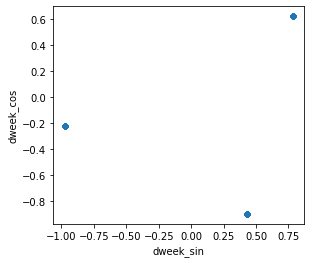

In [34]:
ax = df.plot.scatter('dweek_sin', 'dweek_cos').set_aspect('equal')

## Correlation

In [45]:
df_task.corr(method = 'spearman')

,Month,Week,Day,Dweek,Age,Tenure,Shift,No Error,M/I Error,Total,Error Rate
Month,1.000000,0.959815,0.069391,-0.019964,0.002258,-0.024759,-0.077264,0.094879,0.030170,0.094520,-0.026436
Week,0.959815,1.000000,0.114384,-0.003970,0.008959,-0.016193,-0.072905,0.086792,0.024652,0.086688,-0.026140
Day,0.069391,0.114384,1.000000,0.005484,0.010169,-0.028151,0.021146,-0.009472,0.003783,-0.006996,0.005698
Dweek,-0.019964,-0.003970,0.005484,1.000000,-0.017389,0.003166,-0.037677,0.040547,-0.009592,0.039376,-0.042100
Age,0.002258,0.008959,0.010169,-0.017389,1.000000,-0.021597,-0.030722,0.047247,-0.074680,0.045302,-0.078026
Tenure,-0.024759,-0.016193,-0.028151,0.003166,-0.021597,1.000000,-0.033495,0.024163,0.049849,0.026158,0.013408
Shift,-0.077264,-0.072905,0.021146,-0.037677,-0.030722,-0.033495,1.000000,-0.043646,-0.002138,-0.043353,0.015625
No Error,0.094879,0.086792,-0.009472,0.040547,0.047247,0.024163,-0.043646,1.000000,0.074312,0.999292,-0.447334
M/I Error,0.030170,0.024652,0.003783,-0.009592,-0.074680,0.049849,-0.002138,0.074312,1.000000,0.105357,0.822792
Total,0.094520,0.086688,-0.006996,0.039376,0.045302,0.026158,-0.043353,0.999292,0.105357,1.000000,-0.419706


In [28]:
df.corr()

,mnth_cos,mnth_sin,week_cos,week_sin,day_cos,day_sin,dweek_cos,dweek_sin,second
mnth_cos,1.000000,0.003276,0.054007,0.030689,-0.009824,0.007055,0.000197,-0.004922,-0.018176
mnth_sin,0.003276,1.000000,-0.038615,0.049389,-0.012984,0.008856,-0.009010,-0.011618,-0.007278
week_cos,0.054007,-0.038615,1.000000,-0.000009,0.037826,-0.061409,0.008060,0.006186,0.002726
week_sin,0.030689,0.049389,-0.000009,1.000000,0.063455,0.034574,-0.007568,0.000652,-0.028754
day_cos,-0.009824,-0.012984,0.037826,0.063455,1.000000,-0.000853,-0.009748,0.130738,-0.012788
day_sin,0.007055,0.008856,-0.061409,0.034574,-0.000853,1.000000,-0.038713,0.010030,-0.003082
dweek_cos,0.000197,-0.009010,0.008060,-0.007568,-0.009748,-0.038713,1.000000,-0.003347,-0.004018
dweek_sin,-0.004922,-0.011618,0.006186,0.000652,0.130738,0.010030,-0.003347,1.000000,-0.026215
second,-0.018176,-0.007278,0.002726,-0.028754,-0.012788,-0.003082,-0.004018,-0.026215,1.000000


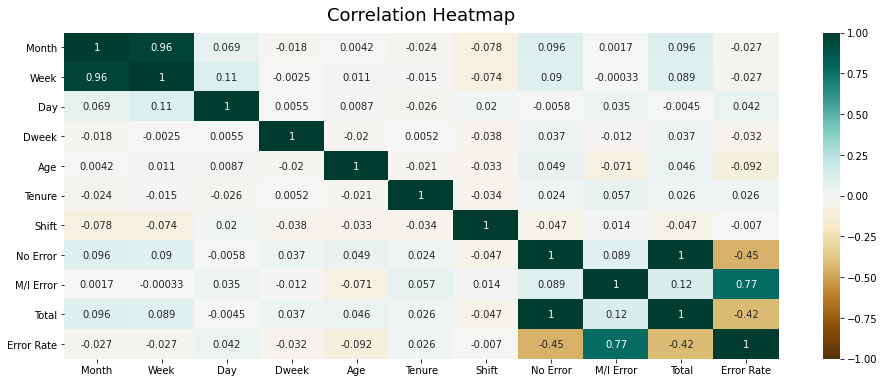

In [8]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_task.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

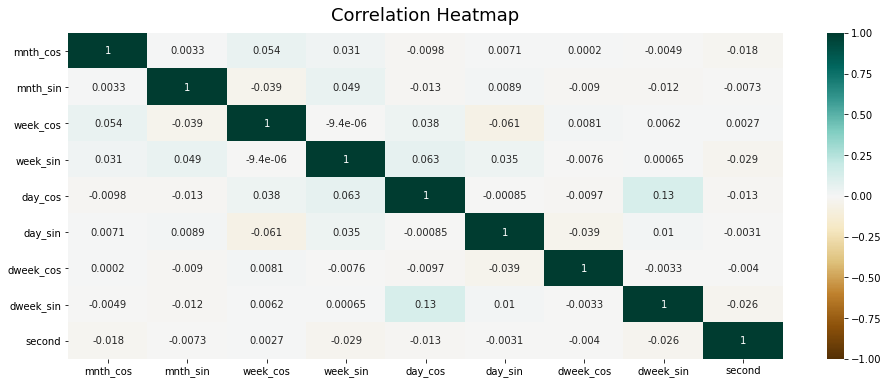

In [29]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

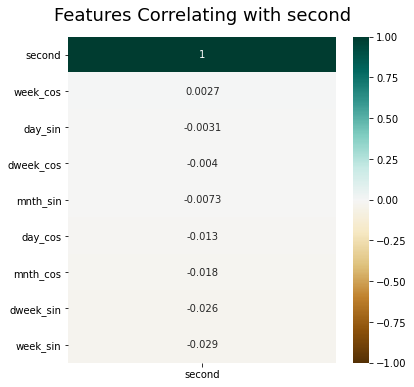

In [30]:
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(df.corr()[['second']].sort_values(by='second', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with second', fontdict={'fontsize':18}, pad=16);

In [71]:
corr_df = df.corr()[['second']].sort_values(by='second', ascending=False)

In [81]:
type(corr_df.iloc[[1]].index.to_numpy())

numpy.ndarray

In [84]:
ind = corr_df.iloc[[1]].index.to_numpy()[0]